In [1]:
import numpy as np
import tensorflow as tf
from adult_modified import preprocess_adult_data
from sklearn import linear_model
import utils
import classifier as cl

In [2]:
seed = 1
dataset_orig_train, dataset_orig_test = preprocess_adult_data(seed = seed)

In [3]:
x_unprotected_train, x_protected_train = dataset_orig_train.features[:, :39], dataset_orig_train.features[:, 39:]
x_unprotected_test, x_protected_test = dataset_orig_test.features[:, :39], dataset_orig_test.features[:, 39:]
y_train, y_test = dataset_orig_train.labels.reshape((-1,)), dataset_orig_test.labels.reshape((-1,))
y_train, y_test = np.array(y_train, dtype= 'int32'), np.array(y_test, dtype='int32')

protected_regression = linear_model.LinearRegression(fit_intercept = False)
protected_regression.fit(x_unprotected_train, x_protected_train)
sensetive_directions = protected_regression.coef_

def projection_matrix(sensetive_directions):
    n, d = sensetive_directions.shape
    mx = np.identity(d)
    for vector in sensetive_directions:
        vector = vector/np.linalg.norm(vector, ord=2)
        vector = vector.reshape((-1,1))
        mx = mx - 0.99* vector @ vector.T
    return mx

unprotected_directions = projection_matrix(sensetive_directions)


In [4]:
x_unprotected_train, x_unprotected_test = tf.cast(x_unprotected_train, dtype = tf.float32), tf.cast(x_unprotected_test, dtype = tf.float32)
y_train, y_test = tf.one_hot(y_train, 2), tf.one_hot(y_test, 2)
unprotected_directions = tf.cast(unprotected_directions, dtype = tf.float32)


In [5]:
graph = utils.ClassifierGraph(50, 2)
graph = cl.Classifier(graph, x_unprotected_train, y_train, x_unprotected_test, y_test, num_steps=1000)

unprotected_directions = tf.cast(unprotected_directions, dtype = tf.float32)

Done step 200

Done step 400

Done step 600

Done step 800

Done step 1000



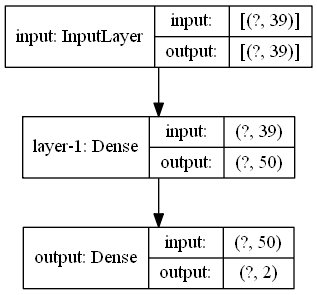

In [7]:
input = tf.keras.Input(shape=(39,), dtype='float32', name='input')
output = graph.call(input)
model = tf.keras.Model(inputs=input, outputs=output)
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
from adversarial_sample import *

[[ 9.99928687e-01  5.15363856e-05  3.47176646e-06 ...  2.20238180e-03
   1.03024868e-03  1.86161822e-03]
 [ 5.15363856e-05  9.99914640e-01 -3.42820389e-05 ... -2.58575815e-03
  -4.51321975e-04  4.80510264e-04]
 [ 3.47176646e-06 -3.42820389e-05  9.99978850e-01 ... -7.63695793e-04
   1.43468950e-04  1.11507031e-03]
 ...
 [ 2.20238180e-03 -2.58575815e-03 -7.63695793e-04 ...  9.11442685e-01
  -2.57592549e-02 -1.97681295e-02]
 [ 1.03024868e-03 -4.51321975e-04  1.43468950e-04 ... -2.57592549e-02
   9.83329245e-01 -3.80214060e-02]
 [ 1.86161822e-03  4.80510264e-04  1.11507031e-03 ... -1.97681295e-02
  -3.80214060e-02  8.82116015e-01]]
Done step 200

Done step 400

Done step 600

Done step 800

Done step 1000

